## Model Building

## Import The Required Model Building Libraries

In [1]:
#import imagedatagenerator
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#training datagen
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [3]:
#testing datagen
test_datagen=ImageDataGenerator(rescale=1./255)

## Importing tensorflow

In [4]:
import tensorflow as tf
import os

## Initialize The Model

In [5]:
#create model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
import numpy as np
import matplotlib.pyplot as plt #to view graph in colab itself
import IPython.display as display
from PIL import Image
import pathlib

## Applying ImageDataGenerator to training set

In [8]:
x_train=train_datagen.flow_from_directory(r'C:\Users\admin\Documents\Nalayathiran\Data Collection\Train',target_size=(64,64),batch_size=200,
                                          class_mode='categorical',color_mode="grayscale")

Found 15750 images belonging to 9 classes.


Applying ImageDataGenerator to test set

In [9]:
x_test=test_datagen.flow_from_directory(r'C:\Users\admin\Documents\Nalayathiran\Data Collection\Test',target_size=(64,64),batch_size=200,
                                          class_mode='categorical',color_mode="grayscale")

Found 2250 images belonging to 9 classes.


In [10]:
a=len(x_train)
b=len(x_test)

## Length of training set

In [11]:
print(a)

79


## Length of test set

In [12]:
print(b)

12


## Add Layers

In [13]:
#create model
model=Sequential()

## Add The Convolution Layer

In [14]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,1),activation='relu'))

## Add Pooling Layer

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

## Add The Flatten Layer

In [16]:
model.add(Flatten())

## Adding The Dense Layers

In [17]:
#1st hidden layer
model.add(Dense(units=512,activation='relu'))
#2nd hidden layer
model.add(Dense(units=261,activation='relu'))

In [18]:
#output layer
model.add(Dense(units=9,activation='softmax'))

## Compile The Model

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Fit The Mode

In [20]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))


C:\Users\admin\AppData\Local\Temp/ipykernel_22852/3557713858.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/10
79/79 [==============================] - 31s 386ms/step - loss: 0.4798 - accuracy: 0.8468 - val_loss: 0.2343 - val_accuracy: 0.9484
Epoch 2/10
79/79 [==============================] - 26s 331ms/step - loss: 0.0517 - accuracy: 0.9853 - val_loss: 0.1920 - val_accuracy: 0.9742
Epoch 3/10
79/79 [==============================] - 28s 348ms/step - loss: 0.0186 - accuracy: 0.9955 - val_loss: 0.1873 - val_accuracy: 0.9716
Epoch 4/10
79/79 [==============================] - 29s 366ms/step - loss: 0.0121 - accuracy: 0.9969 - val_loss: 0.1658 - val_accuracy: 0.9778
Epoch 5/10
79/79 [==============================] - 28s 359ms/step - loss: 0.0085 - accuracy: 0.9980 - val_loss: 0.2077 - val_accuracy: 0.9769
Epoch 6/10
79/79 [==============================] - 26s 324ms/step - loss: 0.0069 - accuracy: 0.9980 - val_loss: 0.2306 - val_accuracy: 0.9769
Epoch 7/10
79/79 [==============================] - 26s 322ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.2584 - val_accuracy: 0.9756

## Save The Model

In [21]:
model.save('asl_model.h5')

## Import The Packages And Load The Saved Model

In [22]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image

In [23]:
#load the model
model=load_model('asl_model.h5')

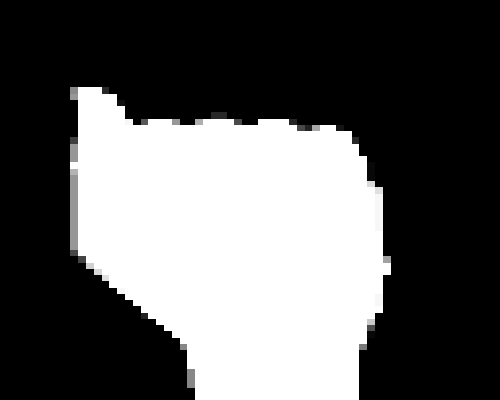

In [25]:
img=image.load_img(r'C:\Users\admin\Documents\Nalayathiran\Data Collection\Test/A/10.png',target_size=(400,500))
img
